In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,50,23.702256,55.272698,746.500877
1,20,18.425919,56.458437,523.177983
2,20,22.750058,60.129024,693.408795
3,10,24.732779,54.471937,812.123646
4,20,20.738355,59.143897,603.333277
...,...,...,...,...
56,20,25.102119,59.717659,837.785907
57,200,12.338487,41.337065,249.172745
58,50,23.702256,55.272698,746.500877
59,200,10.594012,32.369000,163.046009


In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std"]
)

In [8]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

In [9]:
compiled_grouped_res

mae            max_error             \
                                      mean       std       mean        std   
representation num_train_points                                              
DreherDoyle    10                25.486875  3.153364  79.562500  11.581415   
               20                27.336364  3.307117  84.454545   7.903969   
               50                26.418182  3.101386  88.090909   3.238967   
               100               21.594000  2.841765  78.900000   8.033956   
               200               16.552727  2.752316  72.181818   6.226045   

                                         mse              
                                        mean         std  
representation num_train_points                           
DreherDoyle    10                1074.873125  313.930268  
               20                1247.014545  325.141983  
               50                1263.754545  272.830838  
               100                893.606000  209.470519  
               200                586.030909  162.260931

In [10]:
compiled_rxnfp_linear_grouped

mae            max_error                    mse  \
                       mean       std       mean        std        mean   
num_train_points                                                          
10                23.763425  1.153795  64.846259   5.986430  801.937340   
20                21.577061  1.810333  60.746247   6.034914  684.946578   
50                18.564530  1.901270  60.200258  10.405122  533.395420   
100               16.274435  2.015021  58.408548   8.495679  454.790231   
200               13.315537  1.051013  49.577964   4.678286  291.926878   

                             
                        std  
num_train_points             
10                93.596476  
20                80.743632  
50                81.761050  
100               97.693916  
200               45.164642

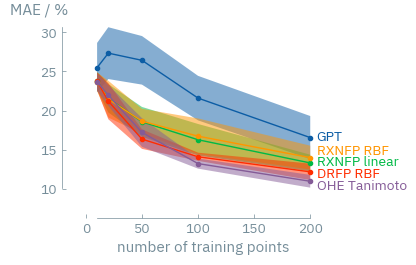

In [21]:

fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"],
    label="RXNFP linear",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["std"],
    compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["std"],
    alpha=.5
)

ax.plot(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"],
    label="RXNFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["std"],
    compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["std"],
    alpha=.5
)

ax.plot(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"],
    label="DRFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["std"],
    compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["std"],
    alpha=.5
)

ax.plot(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"],
    label="OHE Tanimoto",
    marker="o",
)

ax.fill_between(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"],
    compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["std"],
    alpha=.5
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / %", y_pad=-0.1)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_ohe_tanimoto_grouped.index,
     np.stack(
    [  compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"], 
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"]
    ]
     ).flatten()
)

fig.savefig("doyle_regression_res.pdf", bbox_inches="tight")